查看卷积层的输出图像

In [1]:
import sys
sys.path.append("/Users/lihaoyang/Projects/srn-m")

import os
import torch
import torch.nn.functional as F
from neural_network import neural_networks
from load_data import load_mnist_data
from SRNet import srnets
from utils import load_img_srnet, show_img

/Users/lihaoyang/anaconda3/envs/SRNet/lib/python3.9/site-packages/sympy/external/importtools.py:158: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(modversion) < LooseVersion(min_module_version):
/Users/lihaoyang/anaconda3/envs/SRNet/lib/python3.9/site-packages/sympy/external/importtools.py:158: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(modversion) < LooseVersion(min_module_version):


从mnist数据集中找4个例子

torch.Size([4, 32, 32])


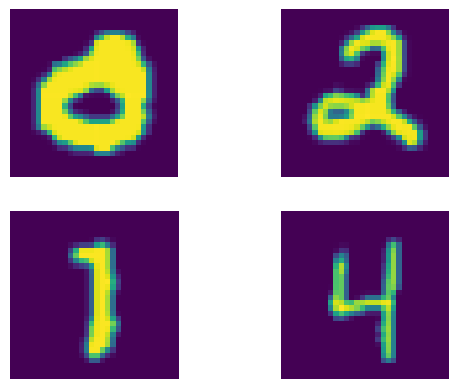

In [2]:
device = torch.device("cpu")
conv_path = "./output/LeNet/LeNet"

net = neural_networks["lenet"](10)
net.load_state_dict(torch.load(conv_path, map_location=device))
net = net.to(device)
train_set, val_set = load_mnist_data("./data/img")
imgs = torch.cat([
    train_set[i][0] for i in [1999, 213, 3456, 92]
], dim=0)
print(imgs.shape)
show_img(imgs, 2, 2)

看数字0第一层卷积和第二层卷积输出卷积图像

outputs length:3


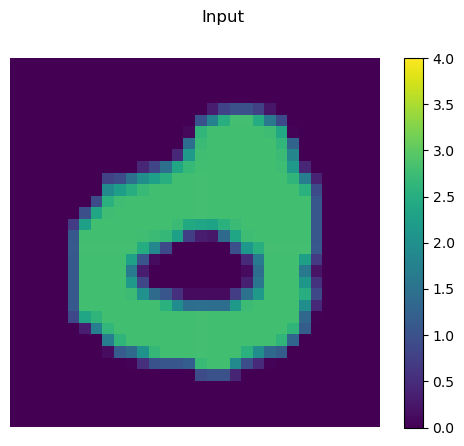

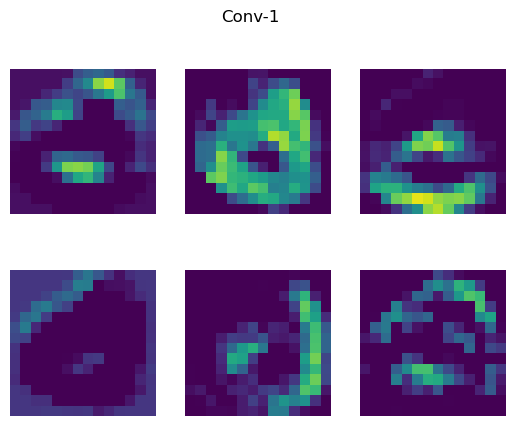

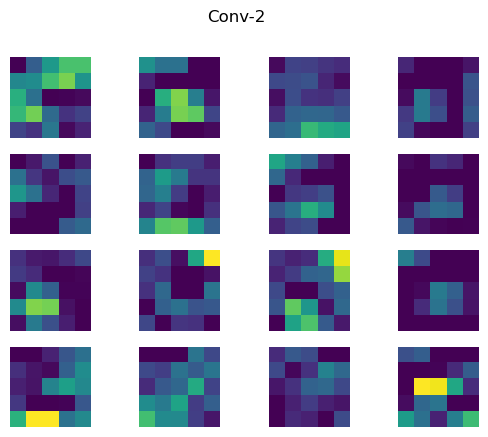

In [3]:
cuda_imgs = imgs.to(device).unsqueeze(dim=1)
show_idx = 0

net.eval()
with torch.no_grad():
    outputs = net(cuda_imgs, module_out=True)
print(f"outputs length:{len(outputs)}")

show_pics = [o[show_idx] for o in outputs[:-1]]
vmin, vmax = 0.0, 4.0
show_img(imgs[show_idx: show_idx + 1], 1, 1, "Input", vmin=vmin, vmax=vmax)
show_img(outputs[0][show_idx], 2, 3, "Conv-1", vmin=vmin, vmax=vmax)
show_img(outputs[1][show_idx], 4, 4, "Conv-2", vmin=vmin, vmax=vmax)

查看用EQL输出的卷积图像

3
torch.Size([4, 6, 14, 14])
torch.Size([4, 16, 5, 5])
torch.Size([4, 10])
tensor(1.2519)


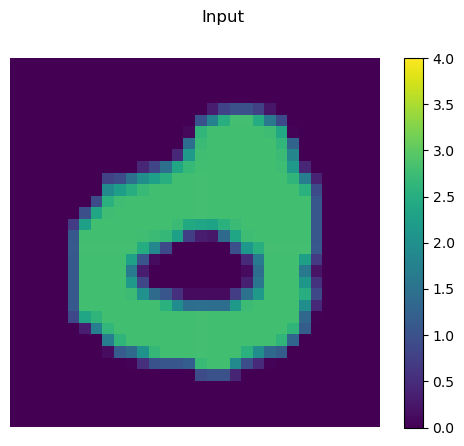

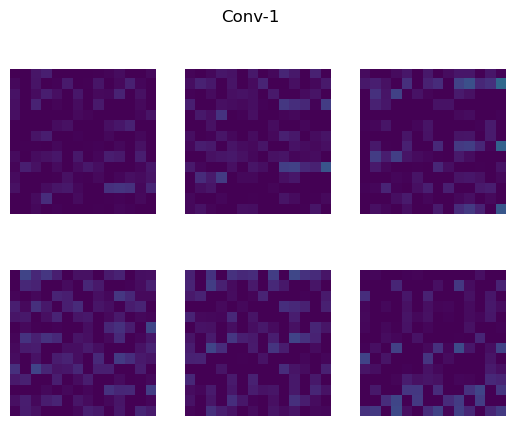

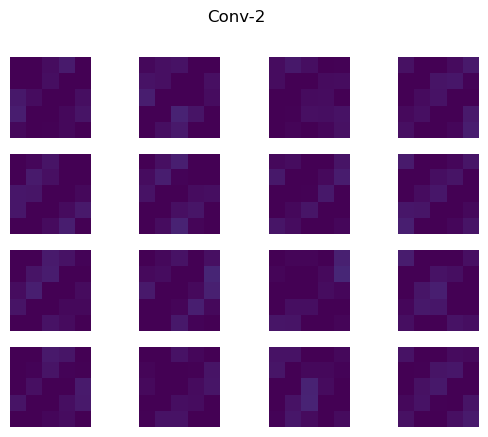

In [4]:
srnet_dir = "./output/MEQL_net/LeNet/bs512-adam1e-3-warm0.1-T1-hce1-okl0.2-glFalse-sgTrue"
srnet = load_img_srnet("MEQL_net", net, srnet_dir, device=device)
srnet = srnet.to(device)
srnet.eval()

with torch.no_grad():
    predicts = srnet(cuda_imgs)
print(len(predicts))

for i, p in enumerate(predicts):
    print(p.shape)
    predicts[i] = predicts[i].cpu()

show_idx = 0
vmin, vmax = 0.0, 4.0
print(F.mse_loss(predicts[0][show_idx], outputs[0][show_idx].cpu()))
show_img(imgs[show_idx: show_idx + 1], 1, 1, "Input", vmin=vmin, vmax=vmax)
show_img(predicts[0][show_idx], 2, 3, "Conv-1", vmin=vmin, vmax=vmax)
show_img(predicts[1][show_idx], 4, 4, "Conv-2", vmin=vmin, vmax=vmax)

3
torch.Size([4, 6, 14, 14])
torch.Size([4, 16, 5, 5])
torch.Size([4, 10])
tensor(0.8939)


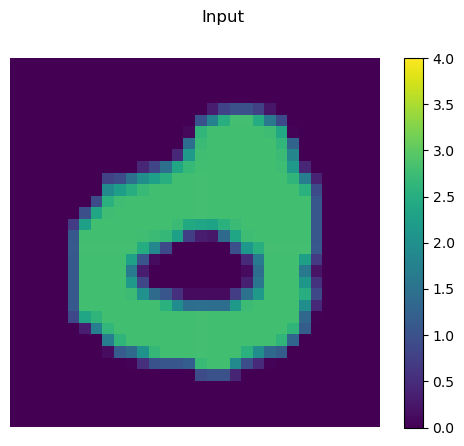

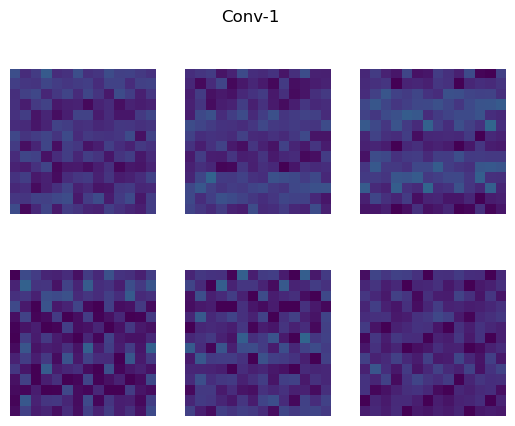

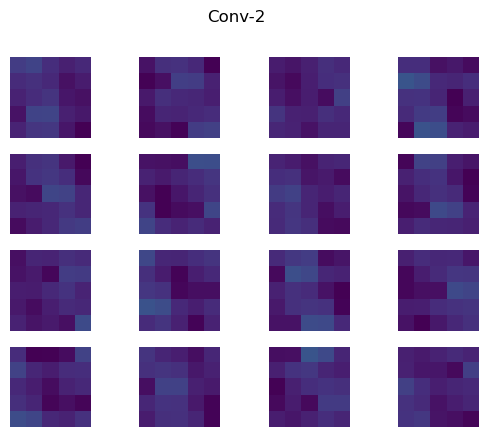

In [5]:
srnet_dir = "./output/MEQL_net/LeNet/bs512-adam1e-3-warm0.1-T1-hmse1-okl1-glFalse-sgTrue"
srnet = load_img_srnet("MEQL_net", net, srnet_dir, device=device)
srnet = srnet.to(device)
srnet.eval()

with torch.no_grad():
    predicts = srnet(cuda_imgs)
print(len(predicts))

for i, p in enumerate(predicts):
    print(p.shape)
    predicts[i] = predicts[i].cpu()

show_idx = 0
vmin, vmax = 0.0, 4.0
print(F.mse_loss(predicts[0][show_idx], outputs[0][show_idx].cpu()))
show_img(imgs[show_idx: show_idx + 1], 1, 1, "Input", vmin=vmin, vmax=vmax)
show_img(predicts[0][show_idx], 2, 3, "Conv-1", vmin=vmin, vmax=vmax)
show_img(predicts[1][show_idx], 4, 4, "Conv-2", vmin=vmin, vmax=vmax)